<a href="https://colab.research.google.com/github/Aswin2808/AI/blob/main/BIGGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install streamlit

In [16]:
!pip install pytorch-pretrained-biggan # Install the missing module

DeltaGenerator()

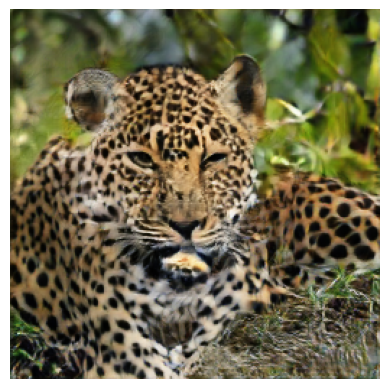

In [17]:
import torch
import streamlit as st
import matplotlib.pyplot as plt
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample)

# Load pre-trained BigGAN model
model = BigGAN.from_pretrained('biggan-deep-256')

# Streamlit UI for selecting the class
option = st.selectbox(
    'Please, select an option',
    ('leopard',)  # You can add more class names here
)

st.write('Wait, the GAN is generating the image. You selected:', option)

# Prepare the input
truncation = 0.4
class_vector = one_hot_from_names([option], batch_size=1)  # Only one image
noise_vector = truncated_noise_sample(truncation=truncation, batch_size=1)

# Convert to tensors
noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

# Generate the image
with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)

# Convert the output tensor to a format suitable for displaying
output = output.cpu().numpy()
output_image = output[0].transpose(1, 2, 0)  # Transpose to (height, width, channels)

# Plotting the image using Matplotlib
plt.imshow((output_image + 1) / 2)  # Normalize to [0, 1]
plt.axis('off')  # Remove axis
plt.savefig("image.png")

# Display the image in Streamlit
st.image("image.png")
